In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import numpy as np
import os
import matplotlib.gridspec as gridspec
from datetime import timedelta
from netCDF4 import Dataset
import sys

In [11]:
flights = dict()
flights_meteo = dict()
path = ''+'/Data/Data_ACP_article/Flights_meteo/' # path to folder with files per flight combined with meteorological data
for rf in os.listdir(path):
    if 'parquet' in rf:
        print(path + rf)
        try:
            data_met = pd.read_parquet(path + rf)
            flights_meteo.update({rf:data_met})
        except IndexError:
            continue
    
df_meteo = pd.DataFrame()
for y in flights_meteo.values():
    df_meteo = pd.concat([df_meteo, y])

campaign_meteo = df_meteo.loc[(df_meteo.index > pd.Timestamp(2021,6,24)) & (df_meteo.index < pd.Timestamp(2021,7,29))]


D:/TUDelft/Repository/Data/Flights_meteo/F02_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F03_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F04_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F05_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F06_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F07_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F08_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F09_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F10_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F11_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F12_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F13_CDPCIPGPIP_Combi_v2_meteo.parquet
D:/TUDelft/Repository/Data/Flights_meteo/F14_CDPCIPG

In [9]:
df_meteo

,dNdD_001,dNdD_002,dNdD_003,dNdD_004,dNdD_005,dNdD_006,dNdD_007,dNdD_008,dNdD_009,dNdD_010,...,pot_temp,static_p,updraft,u_wind,v_wind,ang_wind,mixing,RH_water,TAS,RH_ice
2021-06-25 10:39:32,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-25 10:39:33,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-25 10:39:34,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-25 10:39:35,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-25 10:39:36,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-28 17:56:36,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-28 17:56:37,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-28 17:56:38,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-28 17:56:39,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
direct_ext = ''+'/Data/Data_ACP_article/Extinction/'
for i, file in enumerate(os.listdir(direct_ext)):
    if 'parquet' in file:
        if i == 0:
            ext_data = pd.read_parquet(direct_ext + file)
        else:
            ext_data = pd.concat([ext_data, pd.read_parquet(direct_ext + file)])

In [6]:
ext_data

,Beta_ext
2021-06-25 10:37:41,NaN
2021-06-25 10:37:42,NaN
2021-06-25 10:37:43,NaN
2021-06-25 10:37:44,NaN
2021-06-25 10:37:45,NaN
...,...
2021-07-28 17:57:03,NaN
2021-07-28 17:57:04,NaN
2021-07-28 17:57:05,NaN
2021-07-28 17:57:06,NaN


In [5]:
indexes = []
for i in range(len(ext_data)):
    if ext_data.index[i] in campaign_meteo.index:
        indexes.append(True)
    else:
        indexes.append(False)

In [5]:
plot = campaign_meteo[['N', 'IWC','ED', 'static_temp', 'latitude', 'longitude', 'altitude', 'RH_ice', 'RH_water', 'irs_altitude', 'updraft', 'TAS']]

In [6]:
plot.loc[:, 'Ext'] = ext_data.loc[indexes, :]

C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [7]:
plot = plot.resample('2S').mean()
plot = plot[plot.static_temp <= -38]
plot = plot.dropna(subset=['N', 'IWC', 'ED'])

In [8]:
plot = plot.loc[~((plot.index >= pd.Timestamp(2021,7,8))&(plot.index < pd.Timestamp(2021,7,9)) |
                  (plot.index >= pd.Timestamp(2021,7,13))&(plot.index < pd.Timestamp(2021,7,14)))]

In [9]:
plot['N'] = plot['N'] * 1e-6
plot.IWC = plot.IWC * 1e3
plot.ED = plot.ED *1e6
plot = plot.loc[(plot.N > 0) & (plot.IWC > 0) & (plot.ED>0)]

# Calculate Tropopause Heights

In [10]:
# Path to Tropoapuse_ERA5 files in .nc format
# this data is not provided in the Repository, note README file
# download data from https://doi.org/10.26165/JUELICH-DATA/UBNGI2 and import here
dir_tropop = ''+'/Tropopause_ERA5/' 

In [30]:
f = Dataset(dir_tropop + file)

In [11]:
files = [x for x in os.listdir(dir_tropop)]
files

['era5_2021_06_25.nc',
 'era5_2021_06_26.nc',
 'era5_2021_06_28.nc',
 'era5_2021_06_29.nc',
 'era5_2021_07_01.nc',
 'era5_2021_07_05.nc',
 'era5_2021_07_07.nc',
 'era5_2021_07_12.nc',
 'era5_2021_07_15.nc',
 'era5_2021_07_19.nc',
 'era5_2021_07_21.nc',
 'era5_2021_07_23.nc',
 'era5_2021_07_28.nc']

In [12]:
plot['trop_h_1'] = np.nan
plot['trop_h_2'] = np.nan
plot['trop_h_dyn'] = np.nan
plot['trop_h_cp'] = np.nan

for i, file in enumerate(files):
    f = Dataset(dir_tropop + file)
    time_era5 = pd.to_datetime(f.variables['time'][:], unit='s') + timedelta(days=10957)
    lon_era5 = f.variables['lon'][:].data
    lat_era5 = f.variables['lat'][:].data
    trop_h_era5_1 = f.variables['wmo_1st_z'][:].data
    trop_h_era5_2 = f.variables['wmo_2nd_z'][:].data
    trop_h_era5_dyn = f.variables['dyn_z'][:].data
    trop_h_era5_cp = f.variables['clp_z'][:].data
    day = int(file[-8:-3].split('_')[1])
    month = int(file[-8:-3].split('_')[0])
    subdata = plot[(plot.index.day == day)&(plot.index.month == month)].copy()
    
    trop_h_1 = np.zeros(len(subdata))
    trop_h_2 = np.zeros(len(subdata))
    trop_h_dyn = np.zeros(len(subdata))
    trop_h_cp = np.zeros(len(subdata))
    for i, ind in enumerate(subdata.index):
        diff = abs(time_era5 - subdata.index[i])
        time_ind = np.where(diff == min(diff))[0]
        if len(time_ind) > 1:
            time_ind = time_ind[0]
        diff = abs(lat_era5 - subdata['latitude'].loc[ind])
        lat_ind = np.where(diff == min(diff))[0]
        diff = abs(lon_era5 - subdata['longitude'].loc[ind])
        lon_ind = np.where(diff == min(diff))[0]
        if (len(lon_ind) < 1) or (len(lat_ind) < 1):
            continue
        else:
            trop_h_1[i] = trop_h_era5_1[time_ind, lat_ind, lon_ind]
            trop_h_2[i] = trop_h_era5_2[time_ind, lat_ind, lon_ind]
            trop_h_dyn[i] = trop_h_era5_dyn[time_ind, lat_ind, lon_ind]
            trop_h_cp[i] = trop_h_era5_cp[time_ind, lat_ind, lon_ind]
    
    plot['trop_h_1'].loc[(plot.index.day == day)&(plot.index.month == month)] = trop_h_1
    plot['trop_h_2'].loc[(plot.index.day == day)&(plot.index.month == month)] = trop_h_2
    plot['trop_h_dyn'].loc[(plot.index.day == day)&(plot.index.month == month)] = trop_h_dyn
    plot['trop_h_cp'].loc[(plot.index.day == day)&(plot.index.month == month)] = trop_h_cp
    
    
    f.close()

In [13]:
plot['diff_TP'] = plot['irs_altitude'] - plot['trop_h_1']*1e3

In [14]:
print('stratosphere:', len(plot[plot.diff_TP >=0])/len(plot), 'troposphere:', len(plot[plot.diff_TP <0])/len(plot))

stratosphere: 0.02588926618982251 troposphere: 0.9741107338101775


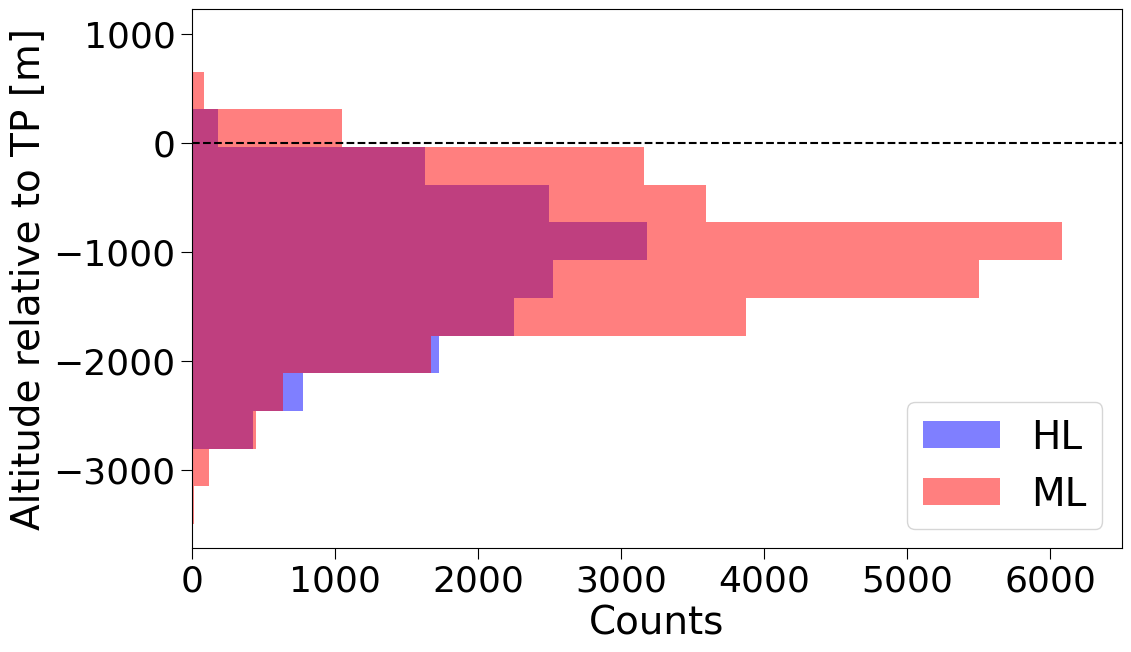

In [15]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

northed = plot[(plot.latitude >= 60)][['ED', 'diff_TP']]
northn = plot[(plot.latitude >= 60)][['N', 'diff_TP']]
southed = plot[(plot.latitude < 60)][['ED', 'diff_TP']]
southn = plot[(plot.latitude < 60)][['N', 'diff_TP']]

hbins = np.linspace(-3500, 1000, 14)
hmidbins = (hbins[:-1]+hbins[1:])/2
hmidbins = [int(x) for x in hmidbins]

ax.hist(northed.diff_TP, bins=hbins, color='blue', alpha=0.5, orientation='horizontal', label='HL')
ax.hist(southed.diff_TP, bins=hbins, color='red', alpha=0.5, orientation='horizontal', label='ML')
ax.hlines(0, 0, 6500, 'black', linestyle='--')
ax.tick_params(axis='both', which='major', labelsize=26, length=8)
ax.set_ylabel('Altitude relative to TP [m]', fontsize=28)
ax.set_xlabel('Counts', fontsize=28)
ax.set_xlim(0, 6500)
ax.legend(fontsize=28, loc='lower right')


# Median and Mean Values for High and Mid-Latitudes

In [16]:
median_N_n = plot[plot.latitude >= 60].N.median()
mean_N_n = plot[plot.latitude >= 60].N.mean()
print(mean_N_n, median_N_n)

0.049605691904259716 0.0010561169420474474


In [17]:
median_N_s = plot[plot.latitude < 60].N.median()
mean_N_s = plot[plot.latitude < 60].N.mean()
print( mean_N_s, median_N_s)

0.2348790626750611 0.008544120228748077


In [18]:
median_Ext_n = plot[plot.latitude >= 60].Ext.median()
mean_Ext_n = plot[plot.latitude >= 60].Ext.mean()
print(mean_Ext_n, median_Ext_n)

0.2087012207256391 0.042463022253419164


In [19]:
median_Ext_s = plot[plot.latitude < 60].Ext.median()
mean_Ext_s = plot[plot.latitude < 60].Ext.mean()
print(mean_Ext_s, median_Ext_s)

0.3919476064331476 0.07152572502502233


In [20]:
mean_ED_s = plot[plot.latitude < 60].ED.mean()
median_ED_s = plot[plot.latitude < 60].ED.median()
print(mean_ED_s, median_ED_s)

177.60663434981558 164.6050640475994


In [21]:
mean_ED_n = plot[plot.latitude >= 60].ED.mean()
median_ED_n = plot[plot.latitude >= 60].ED.median()
print(mean_ED_n, median_ED_n)

240.76042868171947 209.90914927455248


In [22]:
mean_IWC_s = plot[plot.latitude < 60].IWC.mean()
median_IWC_s = plot[plot.latitude < 60].IWC.median()
print(mean_IWC_s, median_IWC_s)

0.019421614344395762 0.0032618153653139865


In [23]:
mean_IWC_n = plot[plot.latitude >= 60].IWC.mean()
median_IWC_n = plot[plot.latitude >= 60].IWC.median()
print(mean_IWC_n, median_IWC_n)

0.009765651999919306 0.0019058093516199069


In [24]:
xedges = np.linspace(20, 80, num=61)
x_mids = [(xedges[i]+xedges[i-1])/2 for i in range(1, len(xedges))]

In [25]:
df_group = plot.copy()
df_group['latitude'] = pd.cut(plot['latitude'] ,
                   bins=xedges, include_lowest=True)
df_medians = df_group.groupby('latitude').median()
df_75 = df_group.groupby('latitude').quantile(q=0.95, interpolation='linear')
df_25 = df_group.groupby('latitude').quantile(q=0.05, interpolation='linear')
df_75.index = x_mids
df_25.index = x_mids
df_medians.index = x_mids
df_25.loc[df_25.ED <5, 'ED'] = np.NaN
df_75.loc[df_75.ED <5, 'ED']  = np.NaN
df_75 = df_75.dropna(subset=['N', 'IWC', 'ED'])
df_25 = df_25.dropna(subset=['N', 'IWC', 'ED'])

In [26]:
ed_median = pd.DataFrame(df_medians.ED.values, index=x_mids)
ed_median = ed_median.dropna()

[4.00833631]


Text(0.5, 0, '[%]')

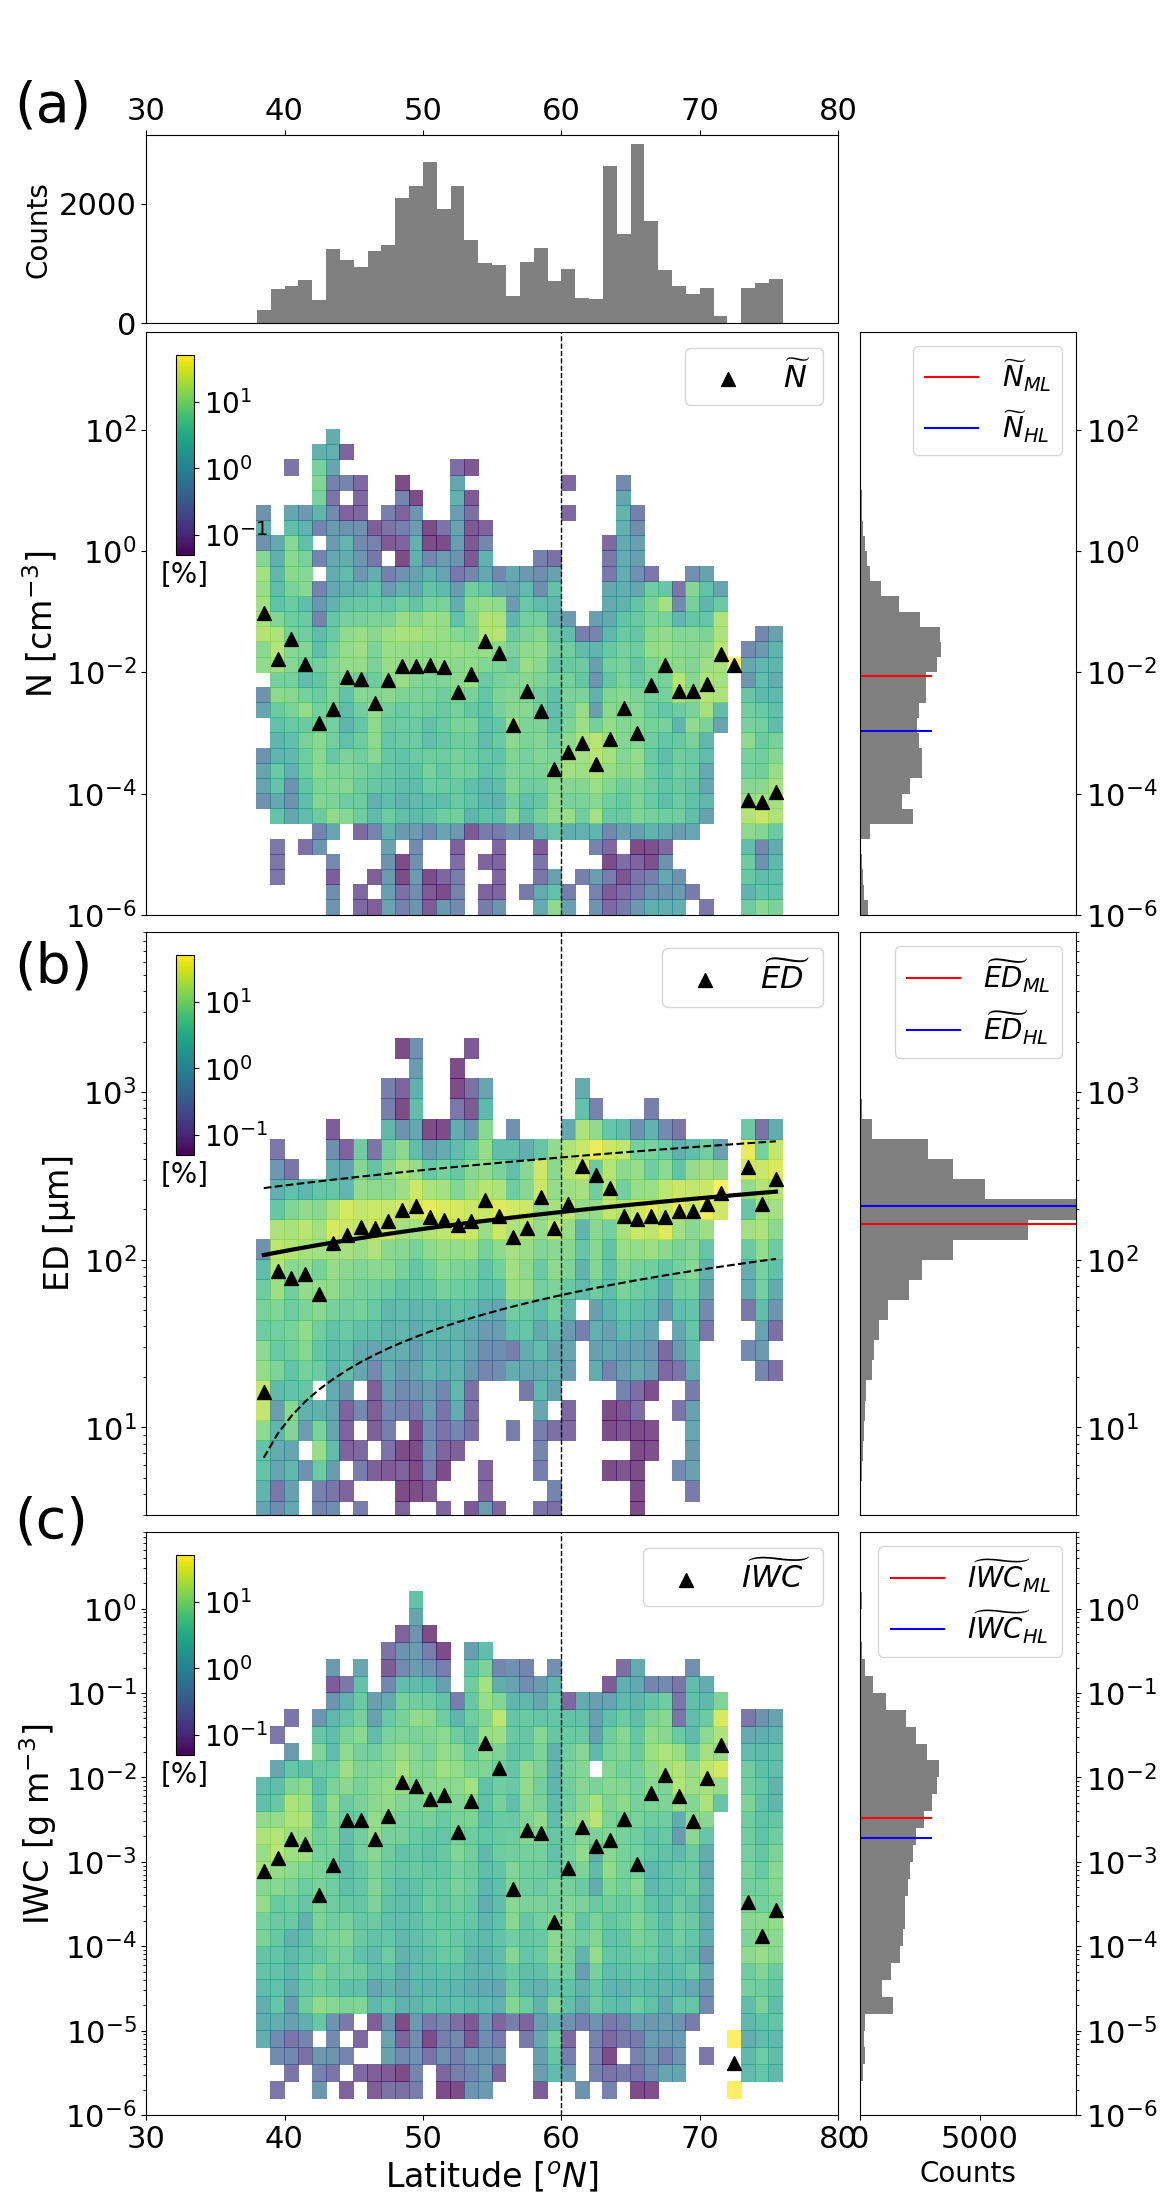

In [27]:
import numpy.ma as ma
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import string

xedges = np.linspace(20, 80, num=61)

fig = plt.figure(figsize=(12,20))
gs1 = GridSpec(4,4, wspace=0.1, hspace=0.05)
gs2 = GridSpec(4,4, wspace=0.1, hspace=0.05)
gs3 = GridSpec(4,4, wspace=0.1, hspace=0.05)

gs1.update(bottom=0.61, top=1)
gs2.update(bottom=0.31, top=0.7)
gs3.update(bottom=0.01, top=0.4)

ax_level = fig.add_subplot(gs1[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs1[0, 0:3], sharex=ax_level)
ax_hist_y = fig.add_subplot(gs1[1:4, 3], sharey=ax_level)
ax_level2 = fig.add_subplot(gs2[1:4, 0:3])
ax_hist_y2 = fig.add_subplot(gs2[1:4, 3], sharey=ax_level2)
ax_level3 = fig.add_subplot(gs3[1:4, 0:3])
ax_hist_y3 = fig.add_subplot(gs3[1:4, 3], sharey=ax_level3)


# N
yedges = np.logspace(-6, 4, num=41)
H, x, y =np.histogram2d(plot.latitude, plot.N, bins=(xedges, yedges))
ymin = 1e-6
ymax = 4000#
med_points = df_medians.N.values
lab_med = r'$\widetilde{N}$'
per75 = df_75.N.values
per25 = df_25.N.values

Hm = ma.masked_where(np.isnan(H), H)

Hm_norm = np.zeros(Hm.shape)
for lat in range(0,Hm.shape[0]):
    Hm_norm[lat,:] = (Hm[lat,:] / np.sum(Hm[lat,:]))*100

X, Y = np.meshgrid(xedges, yedges)

norm = colors.LogNorm(vmin=5e-2, vmax=50)


levels = MaxNLocator(nbins=120).tick_values(5e-2, 50)
ax_level.pcolormesh(x, y, Hm_norm.transpose(), rasterized=True, cmap='viridis', norm=norm, alpha=.7)
ax_level.scatter(x_mids, med_points, marker='^', s=100, c='black', label=lab_med)
ax_level.vlines(60, 1e-6, 1e4, color='k', linestyles='dashed', linewidth=1)
ax_level.set_yscale('log')
ax_level.set_ylim(ymin, ymax)
ax_level.set_xlim(30, 80)
ax_level.get_xaxis().set_visible(False)
ax_level.legend(loc='upper right', fontsize=22)

# N
h_n, bins = np.histogram(plot.N, bins=yedges)
h_n = h_n/h_n.sum()
ax_level.set_ylabel('N [$\mathrm{cm^{-3}}$]', fontsize=24)
ax_hist_y.hist(plot.N, bins=yedges, color='grey', orientation='horizontal')
ax_cbar = fig.add_axes([0.15, 0.79, 0.015, 0.1])
ax_hist_y.hlines(median_N_s, 0, 3000, 'red', label=r'$\widetilde{N}_{ML}$')
ax_hist_y.hlines(median_N_n, 0, 3000, 'blue', label=r'$\widetilde{N}_{HL}$')
ax_hist_y.legend(fontsize=20)
ax_hist_y.set_xlim(0, 9000)

ax_level.tick_params(axis='both', which='major', labelsize=22)

# x histo
ax_hist_x.hist(plot.latitude, bins=xedges, color='grey')
ax_hist_x.set_ylabel('Counts', fontsize=20)
ax_hist_x.tick_params(axis='both', which='major', labelsize=22)
ax_hist_x.xaxis.set_ticks_position('top')

# y histo
ax_hist_y.set_xlabel('Counts', fontsize=20)
ax_hist_y.tick_params(axis='both', which='major', labelsize=22)
ax_hist_y.yaxis.set_ticks_position('right')
ax_hist_y.get_xaxis().set_visible(False)

# colorbar
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=ax_cbar, ticks=[1e-1, 1e0, 1e1])
ax_cbar.tick_params(axis='both', which='major', labelsize=20)
ax_cbar.yaxis.set_ticks_position('right')
ax_cbar.set_xlabel(r'[%]', fontsize=20)

ax_level.annotate('(c)', xy=(10, 480), xycoords='figure points', fontsize=40)
ax_level2.annotate('(b)', xy=(10, 880), xycoords='figure points', fontsize=40)
ax_level3.annotate('(a)', xy=(10, 1500), xycoords='figure points', fontsize=40)

# ED
yedges = np.logspace(-1, 5, num=51)
H, x, y =np.histogram2d(plot.latitude, plot.ED, bins=(xedges, yedges))
ymin = 3
ymax = 9000
lab_med = r'$\widetilde{ED}$'
med_points = df_medians.ED.values
per75 = df_75.ED.values
per25 = df_25.ED.values

Hm = ma.masked_where(np.isnan(H), H)

Hm_norm = np.zeros(Hm.shape)
for lat in range(0,Hm.shape[0]):
    Hm_norm[lat,:] = (Hm[lat,:] / np.sum(Hm[lat,:]))*100

X, Y = np.meshgrid(xedges, yedges)

norm = colors.LogNorm(vmin=5e-2, vmax=50)

levels = MaxNLocator(nbins=120).tick_values(5e-2, 50)
ax_level2.pcolormesh(x, y, Hm_norm.transpose(), rasterized=True, cmap='viridis', norm=norm, alpha=.7)
ax_level2.scatter(x_mids, med_points, marker='^', s=100, c='black', label=lab_med)
m,b = np.polyfit(ed_median.index, ed_median.values, 1)
ax_level2.plot(ed_median.index, ed_median.index*m +b, 'k', linewidth=3)
print(m)
m,b = np.polyfit(df_25.index, per25, 1)
ax_level2.plot(df_25.index, df_25.index*m +b, '--', c='black', linewidth=1.5)
m,b = np.polyfit(df_75.index, per75, 1)
ax_level2.plot(df_75.index, df_75.index*m +b, '--', c='black', linewidth=1.5)
ax_level2.vlines(60, 1e-6, 1e4, color='k', linestyles='dashed', linewidth=1)
ax_level2.set_yscale('log')
ax_level2.set_ylim(ymin, ymax)
ax_level2.set_xlim(30, 80)
ax_level2.get_xaxis().set_visible(False)
ax_level2.legend(loc='upper right', fontsize=22)

#ED
ax_level2.set_ylabel('ED [$\mathrm{\mu m}$]', fontsize=24)
ax_hist_y2.hist(plot.ED, bins=yedges, color='grey', orientation='horizontal')
ax_cbar = fig.add_axes([0.15, 0.49, 0.015, 0.1])
ax_hist_y2.hlines(median_ED_s, 0, 9000, 'red', label=r'$\widetilde{ED}_{ML}$')
ax_hist_y2.hlines(median_ED_n, 0, 9000, 'blue', label=r'$\widetilde{ED}_{HL}$')
ax_hist_y2.legend(fontsize=20)
ax_hist_y2.set_xlim(0, 9000)

ax_level2.tick_params(axis='both', which='major', labelsize=22)

# y histo
ax_hist_y2.set_xlabel('Counts', fontsize=20)
ax_hist_y2.tick_params(axis='both', which='major', labelsize=22)
ax_hist_y2.yaxis.set_ticks_position('right')
ax_hist_y2.get_xaxis().set_visible(False)

# colorbar
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=ax_cbar, ticks=[1e-1, 1e0, 1e1])
ax_cbar.tick_params(axis='both', which='major', labelsize=20)
ax_cbar.yaxis.set_ticks_position('right')
ax_cbar.set_xlabel(r'[%]', fontsize=20)

# IWC
yedges = np.logspace(-6, 2, num=41)
H, x, y =np.histogram2d(plot.latitude, plot.IWC, bins=(xedges, yedges))
ymin = 1*1e-6
ymax = 8
med_points = df_medians.IWC.values
lab_med = r'$\widetilde{IWC}$'
per75 = df_75.IWC.values
per25 = df_25.IWC.values

Hm = ma.masked_where(np.isnan(H), H)
#Hm = np.where(Hm > 250, 250, Hm)

Hm_norm = np.zeros(Hm.shape)
for lat in range(0,Hm.shape[0]):
    Hm_norm[lat,:] = (Hm[lat,:] / np.sum(Hm[lat,:]))*100

X, Y = np.meshgrid(xedges, yedges)

norm = colors.LogNorm(vmin=5e-2, vmax=50)


levels = MaxNLocator(nbins=120).tick_values(5e-2, 50)
ax_level3.pcolormesh(x, y, Hm_norm.transpose(), rasterized=True, cmap='viridis', norm=norm, alpha=.7)
ax_level3.scatter(x_mids, med_points, marker='^', s=100, c='black', label=lab_med)
ax_level3.vlines(60, 1e-6, 1e4, color='k', linestyles='dashed', linewidth=1)
ax_level3.set_yscale('log')
ax_level3.set_ylim(ymin, ymax)
ax_level3.set_xlim(30, 80)
ax_level3.set_xlabel('Latitude [$^{o}N$]', fontsize=24)
ax_level3.legend(loc='upper right', fontsize=22)
    
#IWC
ax_level3.set_ylabel('IWC [$\mathrm{g \ m^{-3}}$]', fontsize=24)
ax_hist_y3.hist(plot.IWC, bins=yedges, color='grey', orientation='horizontal')
ax_cbar = fig.add_axes([0.15, 0.19, 0.015, 0.1])
ax_hist_y3.hlines(median_IWC_s, 0, 3000, 'red', label=r'$\widetilde{IWC}_{ML}$')
ax_hist_y3.hlines(median_IWC_n, 0, 3000, 'blue', label=r'$\widetilde{IWC}_{HL}$')
ax_hist_y3.legend(fontsize=20)
ax_hist_y3.set_xlim(0, 9000)

ax_level3.tick_params(axis='both', which='major', labelsize=22)

# y histo
ax_hist_y3.set_xlabel('Counts', fontsize=20)
ax_hist_y3.tick_params(axis='both', which='major', labelsize=22)
ax_hist_y3.yaxis.set_ticks_position('right')

# colorbar
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=ax_cbar, ticks=[1e-1, 1e0, 1e1])
ax_cbar.tick_params(axis='both', which='major', labelsize=20)
ax_cbar.yaxis.set_ticks_position('right')
ax_cbar.set_xlabel(r'[%]', fontsize=20)


Text(0.5, 0, '[%]')

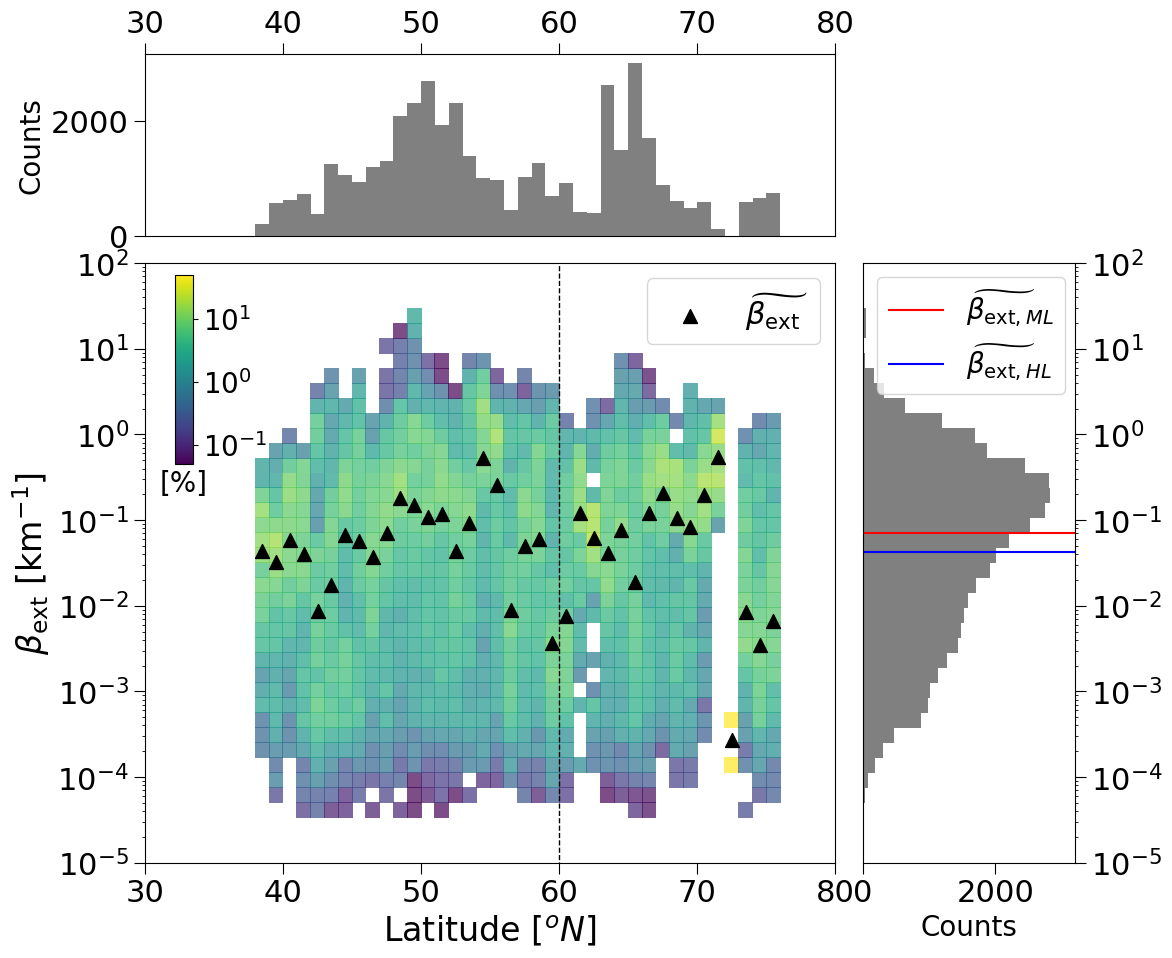

In [28]:
import numpy.ma as ma
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import string

xedges = np.linspace(20, 80, num=61)

fig = plt.figure(figsize=(12,10.5))
gs1 = GridSpec(4,4, wspace=0.13, hspace=0.15)

ax_level = fig.add_subplot(gs1[1:4, 0:3])
ax_hist_x = fig.add_subplot(gs1[0, 0:3], sharex=ax_level)
ax_hist_y = fig.add_subplot(gs1[1:4, 3], sharey=ax_level)

# ED
yedges = np.logspace(-5, 2, num=41)
H, x, y =np.histogram2d(plot.latitude, plot.Ext, bins=(xedges, yedges))
ymin = 1e-5
ymax = 1e2
lab_med = r'$\widetilde{\beta_{\mathrm{ext}}}$'
med_points = df_medians.Ext.values
per75 = df_75.Ext.values
per25 = df_25.Ext.values

Hm = ma.masked_where(np.isnan(H), H)

Hm_norm = np.zeros(Hm.shape)
for lat in range(0,Hm.shape[0]):
    Hm_norm[lat,:] = (Hm[lat,:] / np.sum(Hm[lat,:]))*100

X, Y = np.meshgrid(xedges, yedges)

norm = colors.LogNorm(vmin=5e-2, vmax=50)

levels = MaxNLocator(nbins=120).tick_values(5e-2, 50)
ax_level.pcolormesh(x, y, Hm_norm.transpose(), rasterized=True, cmap='viridis', norm=norm, alpha=.7)
ax_level.scatter(x_mids, med_points, marker='^', s=100, c='black', label=lab_med)
ax_level.vlines(60, 1e-6, 1e4, color='k', linestyles='dashed', linewidth=1)
ax_level.set_yscale('log')
ax_level.set_ylim(ymin, ymax)
ax_level.set_xlim(30, 80)
ax_level.set_xlabel('Latitude [$^{o}N$]', fontsize=24)
ax_level.legend(loc='upper right', fontsize=22)


ax_level.set_ylabel(r'$\beta_{\mathrm{ext}}~ [\mathrm{km}^{-1}$]', fontsize=24)
ax_hist_y.hist(plot.Ext, bins=yedges, color='grey', orientation='horizontal')
ax_cbar = fig.add_axes([0.15, 0.49, 0.015, 0.18])
ax_hist_y.hlines(median_Ext_s, 0, 9000, 'red', label=r'$\widetilde{\beta_{\mathrm{ext,}}}_{ML}$')
ax_hist_y.hlines(median_Ext_n, 0, 9000, 'blue', label=r'$\widetilde{\beta_{\mathrm{ext,}}}_{HL}$')
ax_hist_y.legend(fontsize=20)
ax_hist_y.set_xlim(0, 3200)

ax_level.tick_params(axis='both', which='major', labelsize=22, length=8)

# x histo
ax_hist_x.hist(plot.latitude, bins=xedges, color='grey')
ax_hist_x.set_ylabel('Counts', fontsize=20)
ax_hist_x.tick_params(axis='both', which='major', labelsize=22, length=8)
ax_hist_x.xaxis.set_ticks_position('top')

# y histo
ax_hist_y.set_xlabel('Counts', fontsize=20)
ax_hist_y.tick_params(axis='both', which='major', labelsize=22, length=8)
ax_hist_y.yaxis.set_ticks_position('right')


# colorbar
fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), cax=ax_cbar, ticks=[1e-1, 1e0, 1e1])
ax_cbar.tick_params(axis='both', which='major', labelsize=20)
ax_cbar.yaxis.set_ticks_position('right')
ax_cbar.set_xlabel(r'[%]', fontsize=20)